# The Dataset
Aviation Accident Database & Synopses

Dataset on kaggle.com: https://www.kaggle.com/khsamaha/aviation-accident-database-synopses

URL for webget download: [UPDATED] https://raw.githubusercontent.com/edipetres/Depressed_Year/master/Dataset_Assignment/AviationDataset.csv

## Questions
1. How do the flight phases (ex. take off, cruise, landing..) contribute to fatalities? Chart!
2. Which 5 states saw the most injuries in the US? Show it on a barchart! *
3. Which 5 aircraft models had the most injuries (fatal, serious, minor)? Show them on a piechart!
4. What was the distribution of fatal injuries during the last 20 years? Show it on a barchart!
5. [UPDATED] What was the survival rate (how many died / how many survived) for substantially damaged AND destroyed aircrafts since 1993, showing data for each year. Show results on a stacked bar plot. (see more in notebook 14 - Intro to plotting / example 62.) **

### Notes
Be wary of missing data in the columns

*Injuries are counted from the Total Serious Injuries and Total Minor Injuries columns (by default fatal injuries are not counted here)

** Survivals are counted from the three columns with injuries that are non-fatal (serious, minor injuries and uninjured)

groupMembers = ['Emil Klausen', 'Edmond Petres, 'Lucas Fredmark', 'Plamen Getsov']

In [30]:
# the following line is jupyter notebook specific 
%matplotlib inline

## Question 1
How do the flight phases (ex. take off, cruise, landing..) contribute to fatalities? Chart!

In [31]:
import webget
import pandas as pd
import os
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import io
import requests

url = 'https://raw.githubusercontent.com/edipetres/Depressed_Year/master/Dataset_Assignment/AviationDataset.csv'
s = requests.get(url).content
data =pd.read_csv(io.StringIO(s.decode('ISO-8859-2')), delimiter=',', quotechar='"')

We go through the data set and checks if there's a phase of flight known otherwise it stays "unknown". Then we checks the amount of fatalities for that specific accident. We then add it to the right entry in the dictonary - if the entry doesn't exsist yet, we create it. At last we plot the dictonary. 

In [33]:
def distribution_of_fatalities(data):
    distribution = {}
    
    for row in data.iterrows(): 
        
        phase_of_flight = 'UNKNOWN'
        fatalities = 0
        
        if pd.isnull(row[1][28]):
            pass
        else:
            phase_of_flight = (row[1][28])
            
        try:
            fatalities = int(row[1][23])
        except ValueError:
            pass        
            
            
        if (phase_of_flight not in distribution.keys()):
            distribution[phase_of_flight] = fatalities
        else:
            distribution[phase_of_flight] += fatalities
    
    sorted_keys = sorted(distribution, key=distribution.get) 
    
    fatal_list = list(distribution.values())        
    flight_phases = list(distribution.keys())

    title = 'How do the flight phases contribute to fatalities?'
    plt.title(title, fontsize=16)
    
    plt.xlabel("Flight Phase", fontsize=11)
    plt.ylabel("Number of fatalities", fontsize=11)
    plt.bar(range(len(distribution)), distribution.values(), width=0.75, linewidth=0.5, align='center')
    plt.xticks(range(len(distribution)), flight_phases)
    plt.tick_params(axis='both', which='major', labelsize=6)
    plt.show()

## Question 2
Which 5 states saw the most injuries in the US? Show it on a barchart! *

First we import the libraries that we need.

In [40]:
import pandas as pd
import os
import urllib.request as req
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import heapq

We then read the csv file, which was manually copied into a csv file.

In [41]:
data = pd.read_csv('Aviation.csv', quotechar='"',skipinitialspace=True, delimiter=',', encoding='ISO-8859-2')

In [42]:
def ex2_dict_of_injuries(data):
    country = {}
    for row in data.itertuples():
        tmp = 0
        if pd.notnull( row[25] ):
            tmp += row[25]
        if pd.notnull( row[26] ):
            tmp += row[26]
            
        if (row[6] == "United States" in country):
            country[row[5]] = tmp
        else:
            country.setdefault(row[6], tmp)
    
    return country

We first make an empty dictionay(country), then we make a for loop which wil iterate through some values in our data csv file.
In this loop we have made a tmp integer to prepare values from the csv file(data). We here go through the tuples ([25],[26])
which are minor and major injuries, if it isn't null it gets added to the tmp.
We set row[6] to only take from "United States" and then insert the locations.

In [43]:
def top(c, n=None):
    lis = heapq.nlargest(n, c, key=c.get) 
    dic = {}
    for count in lis:
        dic[count] = c.get(count)
    return dic

Here the values gets sorted from the largest and down.

In [68]:
def dict_keys(d):
    return list(d.keys())

def dict_values(d):
    return list(d.values())
    
def plot(key, value):
    plt.bar(range(len(value)), value, width=0.5, linewidth=1, align='center')
    plt.xticks(range(len(value)), key, size='small')
    title = 'Most major and minor injuries in US states'
    plt.title(title, fontsize=20)
    plt.xlabel("US States/Locations", fontsize=18)
    plt.ylabel("Injuries", fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=6)
    plt.show()

We make the keys and the values into a list and then print the result out.

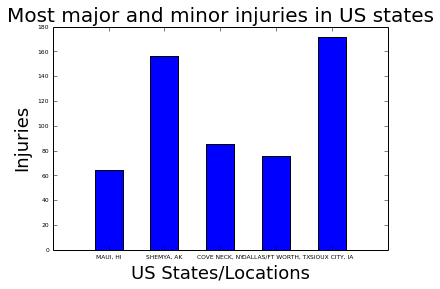

In [69]:
injury_dict = ex2_dict_of_injuries(data)
top_5 = top(injury_dict,5)
key = dict_keys(top_5)
value = dict_values(top_5)
plot(key, value)

## Question 3
Which 5 aircraft models had the most injuries (fatal, serious, minor)? Show them on a piechart!

The first order of business is to import all the libraries that we need. For our solution to this question we will use the following:

In [ ]:
import webget
import pandas as pd
import os
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import heapq

We will be using [pandas](http://pandas.pydata.org/) to read all the data from a csv file and prepare it for data handling as a dataframe object. Webget is a custom library written by us to download a file at a direct link location. Next, [os](https://docs.python.org/2/library/os.html) is used to get the destination of the file platform non-specific. Next, [urlparse](https://docs.python.org/2/library/urlparse.html) is used in conjunction with our webget to wellform a url. Next, [heapq](https://docs.python.org/2/library/heapq.html), which is a module that gives us access to things like the [heapsort](https://en.wikipedia.org/wiki/Heapsort) algorithm.

Before we can do any data handling we must first download the necessary dataset. This is done using a simple webget application and implementing it in a method

In [ ]:
def download_csv(url):
    file = webget.download(url)
    return os.path.basename(urlparse(url).path)

The webget is a custom module made by us, if you don't have your own or prefer to use ours, simply create a new python file in the same directory as this file and paste the following:

In [ ]:
import os
import urllib.request as req
from urllib.parse import urlparse
import urllib

def download(url, to="/tmp/"):
    urlParts = url.split('/')
    filename = urlParts[-1]
    #filepath can be set to anything by specifiying the filepath directory
    to = "./"
    filepath = to + filename;
    file = req.urlretrieve(url, filepath)

Next up is reading the csv file and converting it to a format that is more machine friendly. We use pandas here. The csv file available at the top uses a very specific encoding. Thus we must state that

In [ ]:
def csv_to_df(csv):
    return pd.read_csv(csv, encoding='ISO-8859-2')

#### Data handling
Now we need to extract the necessary data out of the dataset. The code is as follows

In [ ]:
def ex3_dict_of_injuries(dataframe):
    #Aircraft model: data[:,15]    Total Fatal Injuries: data[:,23]    Total Severe Injuries: data[:,24]    Total Mild Injuries: data[:,25]
    aircrafts = {}
    for row in dataframe.iterrows():
        temp = 0
        if pd.notnull( row[1][23] ):
            temp += row[1][23]
        if pd.notnull( row[1][24] ):
            temp += row[1][24]
        if pd.notnull( row[1][25] ):
            temp += row[1][25]
            
        if row[1][15] in aircrafts:
            aircrafts[row[1][15]] += temp
        else:
            aircrafts.setdefault(row[1][15], temp)
    
    return aircrafts

Define a method with the dataframe as a parameter that we got from the previous method. Prepare an empty dictionary. For every row in the data (think rows and columns) we prepare a temp integer variable and then evaluate on the cells [1][23] [1][24] [1][25] which hold the values for injuries. If that value is not blank (dataset) or NaN(code equivalent) we add that value to temp. Finally, if the particular aircraft model in the cell [1][15] is a new one (does not exist in our dictionary) we create a new key entry with temp as its value. Or we use the existing and add temp to it.

We now have a big dictionary with all the entries, however we need to find the top 5 in terms of highest temp value. We implement a method to do this for us:

In [ ]:
def top(d, n=None):
    li = heapq.nlargest(n, d, key=d.get) 
    di = {}
    for ac in li:
        di[ac] = d.get(ac)
    return di

The method takes the dictionary as a parameter and an optional value for how many elements we wish to extract. We use the module heapq to find the n largest elements and return the names of the elements (we don't have their values yet). We prepare an empty dictionary to contain the values as well as the keys. For every aircraft in our top list, we assign the name and the value.

We have the result now. We need to plot it. To do so we need the keys for our x-axis and the values for our y-axis. To get them we need to return the keys/values of the dictionary but as a list. 

Implement:

In [ ]:
def dict_keys(d):
    return list(d.keys())

def dict_values(d):
    return list(d.values())

We are now ready to plot, but we need to define the method that plots and how we want our plot using the matplotlib/pyplot module

In [ ]:
def plot(t5_k, t5_v):
    sizes = [215, 130, 245, 210]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'white', 'red']
    explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice
    plt.pie(t5_v, explode=explode, labels=t5_k, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=80)
 
    plt.axis('equal')
    plt.show()

This method needs to take two parameters (x, y). We specify the visual graphics sizes, colors, explode for style. And then finally we do a pie plot as requested using our values for x(t5_k) and for y(t5_v)

### The Result
![image](http://i66.tinypic.com/14x0vtd.png)

## Question 4
What was the distribution of fatal injuries during the last 20 years? Show it on a barchart!

- Create dictionary of deaths per year
- Read CSV with proper encoding
- The first column is formatted like yyyyMMdd... We extract the year with a substring [0:4]
- If the fatality count of the entry is not invalid, then increment
- Simple bar plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import math

years_dict = defaultdict(lambda: 0)
aviation_data = pd.read_csv("AviationDataset.csv", encoding='ISO-8859-2')

for row in aviation_data.itertuples():
    tmp = row[1][0:4]
    
    if(math.isnan(row[24]) == False):
        years_dict[tmp] += row[24]

plt.bar(range(len(years_dict)), years_dict.values(), align='center')
plt.xticks(range(len(years_dict)), list(years_dict.keys()))

plt.show()

![](figure_1.png)

## Question 5
[UPDATED] What was the survival rate (how many died / how many survived) for substantially damaged AND destroyed aircrafts since 1993, showing data for each year. Show results on a stacked bar plot. (see more in notebook 14 - Intro to plotting / example 62.)